Does the SGA have an uncertainty for the axis ratio ($b/a$)?

In [15]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Main SGA file

In [3]:
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20181114,1,PGC1310416,1,True,202.54443750000002,6.9345944,0.4017908,

# SGA pipeline files

https://www.legacysurvey.org/sga/sga2020/#group-files

It appears that the `Ellipse fits` table should have the fields `[G,R,Z]_EPS` and `[G,R,Z]_EPS_ERR`, which appear to correspond to the `BA` field in the SGA table read in above.  Is this true?  And if so, can we use these errors as uncertainties in `BA`?

It also looks like these files are separate for each galaxy, so we need to read in file for each one to extract the data.

In [7]:
i = 0

sga_id = SGA['SGA_ID'][i]

GROUP_RA = SGA['GROUP_RA'][i]
GROUP_NAME = SGA['GROUP_NAME'][i]

RASLICE = '{:06d}'.format(int(GROUP_RA*1000))[:3]

file_directory = '/global/cfs/cdirs/cosmo/data/sga/2020/data/' + str(RASLICE) + '/' + GROUP_NAME + '/'

filename = GROUP_NAME + '-largegalaxy-' + str(sga_id) + '-ellipse.fits'

In [8]:
galaxy = Table.read(file_directory + filename)
galaxy

SGA_ID,GALAXY,RA,DEC,PGC,PA_LEDA,BA_LEDA,D25_LEDA,BANDS,REFBAND,REFPIXSCALE,SUCCESS,FITGEOMETRY,INPUT_ELLIPSE,LARGESHIFT,RA_X0,DEC_Y0,X0,Y0,EPS,PA,THETA,MAJORAXIS,MAXSMA,INTEGRMODE,SCLIP,NCLIP,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,REFBAND_WIDTH,REFBAND_HEIGHT,G_SMA,G_INTENS,G_INTENS_ERR,G_EPS,G_EPS_ERR,G_PA,G_PA_ERR,G_X0,G_X0_ERR,G_Y0,G_Y0_ERR,G_A3,G_A3_ERR,G_A4,G_A4_ERR,G_RMS,G_PIX_STDDEV,G_STOP_CODE,G_NDATA,G_NFLAG,G_NITER,R_SMA,R_INTENS,R_INTENS_ERR,R_EPS,R_EPS_ERR,R_PA,R_PA_ERR,R_X0,R_X0_ERR,R_Y0,R_Y0_ERR,R_A3,R_A3_ERR,R_A4,R_A4_ERR,R_RMS,R_PIX_STDDEV,R_STOP_CODE,R_NDATA,R_NFLAG,R_NITER,Z_SMA,Z_INTENS,Z_INTENS_ERR,Z_EPS,Z_EPS_ERR,Z_PA,Z_PA_ERR,Z_X0,Z_X0_ERR,Z_Y0,Z_Y0_ERR,Z_A3,Z_A3_ERR,Z_A4,Z_A4_ERR,Z_RMS,Z_PIX_STDDEV,Z_STOP_CODE,Z_NDATA,Z_NFLAG,Z_NITER,G_COG_SMA,G_COG_MAG,G_COG_MAGERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_SMA,R_COG_MAG,R_COG_MAGERR,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_SMA,Z_COG_MAG,Z_COG_MAGERR,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,RADIUS_SB22,RADIUS_SB22_ERR,RADIUS_SB22.5,RADIUS_SB22.5_ERR,RADIUS_SB23,RADIUS_SB23_ERR,RADIUS_SB23.5,RADIUS_SB23.5_ERR,RADIUS_SB24,RADIUS_SB24_ERR,RADIUS_SB24.5,RADIUS_SB24.5_ERR,RADIUS_SB25,RADIUS_SB25_ERR,RADIUS_SB25.5,RADIUS_SB25.5_ERR,RADIUS_SB26,RADIUS_SB26_ERR,G_MAG_SB22,G_MAG_SB22_ERR,G_MAG_SB22.5,G_MAG_SB22.5_ERR,G_MAG_SB23,G_MAG_SB23_ERR,G_MAG_SB23.5,G_MAG_SB23.5_ERR,G_MAG_SB24,G_MAG_SB24_ERR,G_MAG_SB24.5,G_MAG_SB24.5_ERR,G_MAG_SB25,G_MAG_SB25_ERR,G_MAG_SB25.5,G_MAG_SB25.5_ERR,G_MAG_SB26,G_MAG_SB26_ERR,R_MAG_SB22,R_MAG_SB22_ERR,R_MAG_SB22.5,R_MAG_SB22.5_ERR,R_MAG_SB23,R_MAG_SB23_ERR,R_MAG_SB23.5,R_MAG_SB23.5_ERR,R_MAG_SB24,R_MAG_SB24_ERR,R_MAG_SB24.5,R_MAG_SB24.5_ERR,R_MAG_SB25,R_MAG_SB25_ERR,R_MAG_SB25.5,R_MAG_SB25.5_ERR,R_MAG_SB26,R_MAG_SB26_ERR,Z_MAG_SB22,Z_MAG_SB22_ERR,Z_MAG_SB22.5,Z_MAG_SB22.5_ERR,Z_MAG_SB23,Z_MAG_SB23_ERR,Z_MAG_SB23.5,Z_MAG_SB23.5_ERR,Z_MAG_SB24,Z_MAG_SB24_ERR,Z_MAG_SB24.5,Z_MAG_SB24.5_ERR,Z_MAG_SB25,Z_MAG_SB25_ERR,Z_MAG_SB25.5,Z_MAG_SB25.5_ERR,Z_MAG_SB26,Z_MAG_SB26_ERR
,,deg,deg,,deg,,arcmin,,,arcsec / pix,,,,,deg,deg,pix,pix,,deg,deg,pix,pix,,,,arcsec,arcsec,arcsec,mag,mag,mag,,,,pix,pix,pix,,,,,deg,deg,pix,pix,pix,pix,,,,,,,,,,,pix,,,,,deg,deg,pix,pix,pix,pix,,,,,,,,,,,pix,,,,,deg,deg,pix,pix,pix,pix,,,,,,,,,,,arcsec,mag,mag,mag,mag,,,,arcsec,mag,mag,mag,mag,,,,arcsec,mag,mag,mag,mag,,,,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int64,bytes10,float64,float64,int64,float32,float32,float32,bytes4[3],bytes1,float32,bool,bool,bool,bool,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes6,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],int16[84],int16[84],int16[84],int16[84],float64[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],int16[84],int16[84],int16[84],int16[84],float64[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],float32[84],int16[84],int16[84],int16[84],int16[84],float32[165],float32[165],float32[165],float32,float32,float32,float32,float3

In [10]:
1 - SGA['BA'][i]

0.45430898666381836

In [25]:
galaxy['R_EPS_ERR'][0]

array([0.0000000e+00, 1.7709179e-02, 4.7518392e-03, 3.5709704e-03,
       2.6773550e-03, 1.5634997e-03, 7.1045628e-04, 4.1678589e-04,
       3.3421986e-04, 3.6298003e-04, 3.3088174e-04, 4.3625035e-04,
       5.9528049e-04, 7.7416864e-04, 8.0347911e-04, 9.4449549e-04,
       1.1829751e-03, 1.4672276e-03, 1.6641705e-03, 1.8944800e-03,
       2.2570924e-03, 2.2998722e-03, 2.6135882e-03, 2.9070040e-03,
       2.7245081e-03, 2.7212473e-03, 3.1571155e-03, 3.7309637e-03,
       3.3542477e-03, 2.8197463e-03, 3.0591663e-03, 3.0935614e-03,
       3.3626975e-03, 2.6518172e-03, 3.0790102e-03, 3.7817615e-03,
       3.6957196e-03, 3.7330885e-03, 3.6947255e-03, 4.5665610e-03,
       4.4445721e-03, 4.3832762e-03, 6.0960050e-03, 5.3800754e-03,
       4.0115360e-03, 5.9143309e-03, 4.7926707e-03, 4.6915454e-03,
       4.4717458e-03, 5.5114040e-03, 1.0289419e-02, 7.4922158e-03,
       5.0962726e-03, 5.1559024e-03, 9.2906626e-03, 8.8435384e-03,
       4.9656937e-03, 1.3579208e-02, 2.0732176e-02, 2.2882462e

In [26]:
galaxy['G_EPS_ERR'][0]

array([0.00000000e+00, 1.98929105e-02, 3.43262893e-03, 4.17468883e-03,
       3.21473088e-03, 1.55180041e-03, 9.32459545e-04, 8.23472859e-04,
       7.10731314e-04, 4.76983667e-04, 5.32167847e-04, 7.43767596e-04,
       8.43560440e-04, 9.17008030e-04, 1.10061315e-03, 1.17927860e-03,
       1.38614804e-03, 1.68135460e-03, 2.13614246e-03, 2.43604928e-03,
       2.78994534e-03, 2.97260261e-03, 3.25200497e-03, 4.14683577e-03,
       3.69919417e-03, 2.85759452e-03, 2.86888075e-03, 3.44763254e-03,
       3.52237350e-03, 3.16803437e-03, 3.77714541e-03, 4.26158588e-03,
       3.97371082e-03, 4.36819810e-03, 3.71105969e-03, 4.16750833e-03,
       4.18784795e-03, 5.47244074e-03, 4.86856978e-03, 7.81678222e-03,
       6.78187748e-03, 5.53348986e-03, 1.20777693e-02, 6.47635479e-03,
       1.37095246e-02, 1.08153000e-02, 4.02378524e-03, 7.45896902e-03,
       7.36270053e-03, 4.90194466e-03, 5.67465322e-03, 9.80461296e-03,
       7.60147907e-03, 2.13384796e-02, 1.68459807e-02, 2.03378871e-02,
      

In [27]:
galaxy['Z_EPS_ERR'][0]

array([0.00000000e+00, 1.68664493e-02, 5.86713525e-03, 3.73972813e-03,
       2.80356780e-03, 1.60125282e-03, 9.22047242e-04, 5.00428723e-04,
       2.77074461e-04, 2.64238857e-04, 2.29644167e-04, 4.14739246e-04,
       5.38801716e-04, 6.61720755e-04, 6.73822884e-04, 7.94352673e-04,
       8.64810834e-04, 1.13796256e-03, 1.38440833e-03, 1.70802034e-03,
       2.01935810e-03, 2.20608898e-03, 2.48920801e-03, 2.54858984e-03,
       2.57733394e-03, 2.61307159e-03, 2.54195137e-03, 2.62742350e-03,
       2.94011622e-03, 2.68614292e-03, 2.99089192e-03, 2.72089383e-03,
       3.54713481e-03, 3.04539665e-03, 2.84853228e-03, 2.98866211e-03,
       2.91035883e-03, 3.62930098e-03, 4.07788018e-03, 5.76210162e-03,
       6.56389957e-03, 5.88709489e-03, 4.65682149e-03, 6.40133815e-03,
       5.88800805e-03, 4.44826391e-03, 6.08927011e-03, 5.62814390e-03,
       1.20897703e-02, 5.41166076e-03, 7.13985926e-03, 9.22395568e-03,
       8.05108901e-03, 1.06720710e-02, 1.70772094e-02, 6.12373836e-03,
      

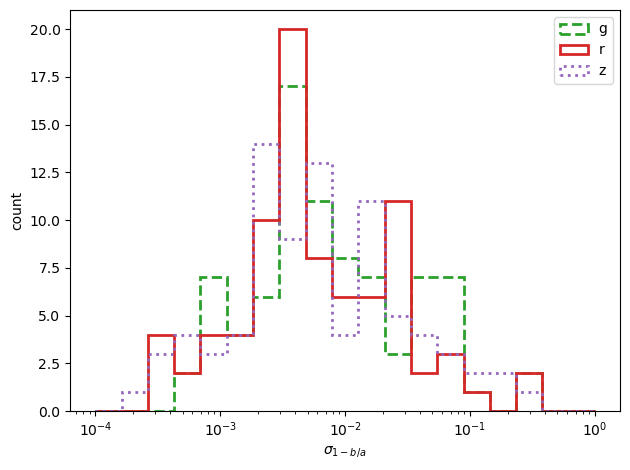

In [41]:
plt.figure(tight_layout=True)

bins = np.logspace(-4, 0, 20)

plt.hist(galaxy['G_EPS_ERR'][0], 
         bins=bins, 
         color='tab:green', 
         histtype='step', 
         linewidth=2, 
         linestyle='dashed', 
         label='g')
plt.hist(galaxy['R_EPS_ERR'][0], 
         bins=bins, 
         color='tab:red', 
         histtype='step', 
         linewidth=2, 
         label='r')
plt.hist(galaxy['Z_EPS_ERR'][0], 
         bins=bins, 
         color='tab:purple', 
         histtype='step', 
         linewidth=2, 
         linestyle='dotted', 
         label='z')

plt.xscale('log')

plt.legend()

plt.xlabel('$\sigma_{1 - b/a}$')
plt.ylabel('count');

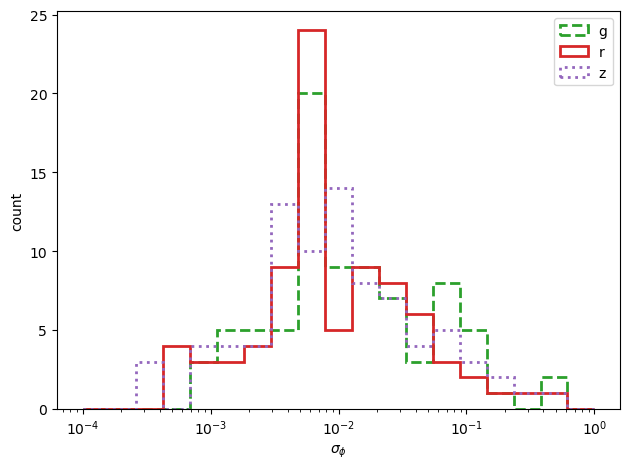

In [42]:
plt.figure(tight_layout=True)

bins = np.logspace(-4, 0, 20)

plt.hist(galaxy['G_PA_ERR'][0], 
         bins=bins, 
         color='tab:green', 
         histtype='step', 
         linewidth=2, 
         linestyle='dashed', 
         label='g')
plt.hist(galaxy['R_PA_ERR'][0], 
         bins=bins, 
         color='tab:red', 
         histtype='step', 
         linewidth=2, 
         label='r')
plt.hist(galaxy['Z_PA_ERR'][0], 
         bins=bins, 
         color='tab:purple', 
         histtype='step', 
         linewidth=2, 
         linestyle='dotted', 
         label='z')

plt.xscale('log')

plt.legend()

plt.xlabel('$\sigma_{\phi}$')
plt.ylabel('count');